In [20]:
import numpy as np
import pandas as pd
import os

In [2]:
os.chdir('G:/My Drive/2020/Bias/data-processing/')

In [3]:
test_dt = pd.read_csv('pred_cf.csv')

In [30]:
col = list(test_dt.columns)

In [37]:
val = list(test_dt[test_dt['ids']==289].values)[0]

test = pd.DataFrame(np.array([val[1:-2],col[1:-2]]).T)
test.sort_values(by=0, ascending=False).head(20)




,0,1
721,0.25355267519675023,53033007300_12_5
731,0.2522930557537274,53033007300_12_55
715,0.2521421588335739,53033007300_11_35
732,0.2520737054451221,53033007300_13_0
695,0.25136089960641816,53033007300_9_55
749,0.2513381283026141,53033007300_14_25
705,0.2510083135284936,53033007300_10_45
777,0.25097146680869964,53033007300_16_45
706,0.250689211239345,53033007300_10_50
712,0.2505553371044416,53033007300_11_20


,0,1
2171,0.27532824528870864,53033008100_12_55
2170,0.2751887859571974,53033008100_12_50
2160,0.2740477769551627,53033008100_12_0
2162,0.2737880616112132,53033008100_12_10
2158,0.2731823337663924,53033008100_11_50
2138,0.2731585941293149,53033008100_10_10
2157,0.27313525951826184,53033008100_11_45
2151,0.2722161954631893,53033008100_11_15
2139,0.27215434234328784,53033008100_10_15
2207,0.2719000739535033,53033008100_15_55


In [1]:
import pandas as pd
import numpy as np
from datetime import *
from collections import *
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from matplotlib import rcParams
import csv
import os
import math

In [2]:
# check the file in the current location
file = os.listdir
# file
# if it is not in the current location, you will need to find the right path to read the document
# eg: file = os.listdir(path='../New Source/')
data = pd.read_excel("SDOT Sensys Oct - Nov 2019.xlsx", header=1)
data.head()

,Apeg,Name1,Sensor Zone,"October 1, 2019 12 AM","October 1, 2019 1 AM","October 1, 2019 2 AM","October 1, 2019 3 AM","October 1, 2019 4 AM","October 1, 2019 5 AM","October 1, 2019 6 AM",...,"November 30, 2019 2 PM","November 30, 2019 3 PM","November 30, 2019 4 PM","November 30, 2019 5 PM","November 30, 2019 6 PM","November 30, 2019 7 PM","November 30, 2019 8 PM","November 30, 2019 9 PM","November 30, 2019 10 PM","November 30, 2019 11 PM"
0,apeg0125,Ballard Bridge,0125S_NBT_1,39.0,24.0,21.0,14.0,33.0,76.0,199.0,...,737.0,770.0,731.0,616.0,509.0,420.0,309.0,316.0,282.0,167.0
1,NaN,NaN,0125S_NBT_2,75.0,42.0,40.0,33.0,87.0,316.0,402.0,...,1237.0,1076.0,1209.0,1078.0,950.0,763.0,659.0,584.0,482.0,346.0
2,NaN,NaN,0125S_SBT_1,34.0,17.0,13.0,17.0,36.0,151.0,312.0,...,628.0,565.0,586.0,537.0,447.0,385.0,296.0,271.0,224.0,166.0
3,NaN,NaN,0125S_SBT_2,35.0,24.0,23.0,23.0,69.0,192.0,507.0,...,767.0,749.0,681.0,624.0,514.0,393.0,295.0,280.0,224.0,167.0
4,apeg0243,5th Ave & Spring St,0243S_SBT_1,11.0,14.0,9.0,10.0,11.0,35.0,42.0,...,83.0,83.0,85.0,89.0,73.0,69.0,50.0,53.0,32.0,36.0


In [3]:
# select three weeks before/after tolling: Nov 9,2019
#for i in range(len(data.index)):
data['Sensor Zone'][0].split('_')[0]

'0125S'

In [4]:
# get column/row names
colname = list(data.columns)
# list(data.index)
# get a specific value
# data.iloc[0,0]
# change the data type if you want to work on the datetime 
# detailed instruction can be checked through URL below: 
# https://www.journaldev.com/23365/python-string-to-datetime-strptime
# datetime.strptime(colname[3],'%B %d, %Y %I %p').weekday() in [1,2,3]
datetime.strptime(colname[3],'%B %d, %Y %I %p')
len(colname[3:])

1440

In [5]:
#get column location of the three week before/after tolling date
for i in range(3, len(colname)):
    a = datetime.strptime(colname[i],'%B %d, %Y %I %p').strftime('%Y-%m-%d-%H')
    if a == '2019-10-19-00':
        firstt = i
    if a == '2019-11-29-23':
        lastt = i

numrow = len(data.index)
volcheck = 0
volt = 0
# find available data
availdata = []
nonavaildata = []
for j in range(numrow):
    volcheck = 0
    for i in range(firstt, lastt+1):
        if np.isnan(data.iloc[j,i]) == False:
            volcheck = volcheck+1
    if volcheck == lastt-firstt+1:
        availdata.append(data['Sensor Zone'][j])
    else:
        nonavaildata.append(data['Sensor Zone'][j])

In [6]:
# through checking the available and non-avaialble data, it is able to know that
# no sensys has been overlapped with both available and nonavailable data
'''t =[]
t2 = []
for id in nonavaildata:
    if id[:5] not in t:
        t.append(id[:5])

for id in availdata:
    if id[:5] not in t2:
        t2.append(id[:5])

for i in t:
    print(i in t2)'''

't =[]\nt2 = []\nfor id in nonavaildata:\n    if id[:5] not in t:\n        t.append(id[:5])\n\nfor id in availdata:\n    if id[:5] not in t2:\n        t2.append(id[:5])\n\nfor i in t:\n    print(i in t2)'

In [7]:
volmap = {}
for i in range(numrow):
    if data['Sensor Zone'][i][:-2] not in volmap and data['Sensor Zone'][i] in availdata:
        volmap[data['Sensor Zone'][i][:-2]] = data.iloc[i,firstt:lastt+1]
    elif data['Sensor Zone'][i][:-2] in volmap and data['Sensor Zone'][i] in availdata:
        volmap[data['Sensor Zone'][i][:-2]] = volmap[data['Sensor Zone'][i][:-2]]+data.iloc[i,firstt:lastt+1]
    

In [ ]:
## ??? plt.plot(volmap['0125S_NBT'])    

In [80]:
# check if we have the entire data in Nov and Oct
checklist = []
for name in colname[3:]:
    a = datetime.strptime(name,'%B %d, %Y %I %p').strftime('%Y-%m-%d')
    if a not in checklist:
        checklist.append(a)

In [27]:
datelst = list(volmap['0125S_NBT'].index)

for i in range(len(datelst)):
    datelst[i] = datetime.strptime(datelst[i],'%B %d, %Y %I %p').strftime('%Y-%m-%d-%H')

'2019-11-29-23'

In [51]:
# example to plot
# plot date from 10-19-2019-00 till 10-25-2019-23
# check the location
def checkloc(checkdate):
    for i in range(len(datelst)):
        if datelst[i] == checkdate:
            a = i
            break
    return(a)

# eg:
n = checkloc('2019-10-19-23')
n       

23

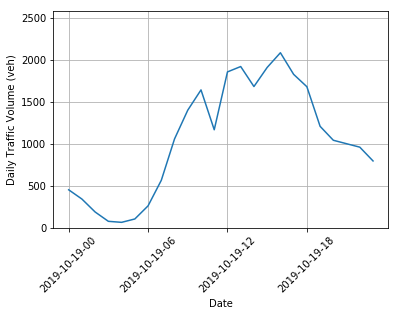

In [66]:
# three weeks before tolling
for sesid in volmap:
    steps = 6
    fig, ax=plt.subplots()
    y = volmap[sesid][:n+1]
    x = datelst[:n+1]
    ax.plot(x,y)
    ax.set_ylim(0, max(y)+500)
    xlabes = [x[i*steps] for i in range(int((len(x)+steps-1)/steps))]
    ax.set_xticks(np.arange(0, len(x), step=steps))
    ax.set_xticklabels(xlabels, rotation=45)
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Daily Traffic Volume (veh)')
    plt.show()
    break